# Data Analysis Notebook

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First, let's load the clean files we saved previously.

In [5]:
#load clean data sets
title_budgets_df = pd.read_csv('data/cleaned_title_budgets_df.csv', index_col=0)
directors_df = pd.read_csv('data/cleaned_directors_df.csv', index_col=0)

In [6]:
title_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,ROI,primary_genre,release_month,release_year
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,93.0,Horror,5.532577,Horror,Dec,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,136.0,"Action,Adventure,Fantasy",1.546673,Action,May,2011
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,113.0,"Action,Adventure,Sci-Fi",-0.572108,Action,Jun,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,141.0,"Action,Adventure,Sci-Fi",3.243841,Action,May,2015
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",5.827114,Action,Apr,2018


In [7]:
directors_df.head()

,nconst,primary_name,primary_profession,known_for_titles,tconst,category
12,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2057445,director
13,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt1592569,director
14,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2590280,director
15,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt8421806,director
48,nm0064023,Bryan Beasley,"director,producer,writer","tt3501180,tt1485100,tt1358897,tt1387162",tt3501180,director


### ROI by Genre

The first question we would like to explore is how genre relates to a movie's ROI. To do this, we need to group the movies into genres and plot against ROI.

In [22]:
# group movies by primary_genre in a new dataframe, and sort by ROI.

genres_ROI_df = title_budgets_df.groupby(['primary_genre']).mean().reset_index()
genres_ROI_df.sort_values(by = ['ROI'], ascending = False, inplace=True)
genres_ROI_df

,primary_genre,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,release_year
12,Musical,3.087500e+07,7.751199e+07,2.092098e+08,126.000000,23.630913,1995.250000
10,Horror,1.453301e+07,3.343511e+07,7.496393e+07,92.637037,13.565620,2010.333333
2,Animation,4.148987e+07,8.094487e+07,1.795110e+08,85.181818,8.663802,2002.818182
16,Thriller,1.819787e+07,1.908578e+07,3.719005e+07,89.954545,5.499232,2003.954545
3,Biography,2.212839e+07,3.229156e+07,6.509016e+07,108.613333,4.862634,2011.633333
7,Drama,1.882577e+07,2.514349e+07,5.109156e+07,103.129979,2.343496,2008.930818
0,Action,7.014503e+07,7.707130e+07,2.086961e+08,110.431193,2.131694,2011.889908
4,Comedy,2.040214e+07,3.200412e+07,5.884439e+07,100.321951,2.063920,2011.219512
1,Adventure,6.884572e+07,8.452708e+07,2.318463e+08,99.256281,2.047448,2011.969849
13,Mystery,2.839167e+07,5.949053e+07,1.226127e+08,109.000000,1.759611,2006.333333


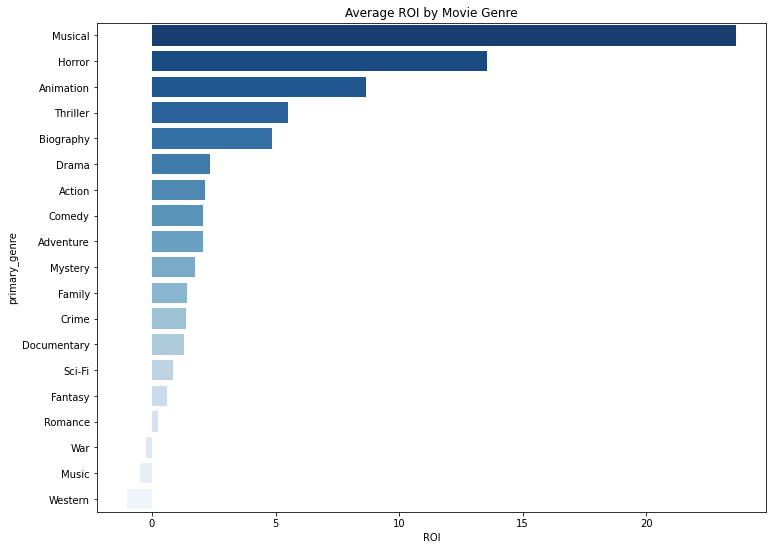

In [23]:
plt.figure(figsize=(12,9))
ax = sns.barplot(x = 'ROI', y = 'primary_genre', 
            data=genres_ROI_df, 
            palette="Blues_r")
ax.set_title('Average ROI by Movie Genre');

It looks like Musicals are the movie genre with the highest return on investment. Let's investigate the data a little more to check if this is a logical conclusion.

In [73]:
title_budgets_df['primary_genre'].value_counts()

Action         545
Drama          477
Comedy         410
Adventure      199
Biography      150
Documentary    137
Horror         135
Crime          122
Thriller        22
Animation       22
Sci-Fi          11
Family           8
Fantasy          7
Mystery          6
Romance          5
Musical          4
Music            2
War              1
Western          1
Name: primary_genre, dtype: int64

In [19]:
title_budgets_df[title_budgets_df['primary_genre']=='Musical']

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,ROI,primary_genre,release_month,release_year
491,"Mar 13, 2015",Cinderella,95000000.0,201151353.0,534551353.0,tt10013634,150.0,Musical,4.626856,Musical,Mar,2015
3154,"Sep 8, 2006",The Covenant,20000000.0,23364784.0,38164784.0,tt3296724,99.0,Musical,0.908239,Musical,Sep,2006
5185,"Jul 16, 2010",Standing Ovation,5600000.0,531806.0,531806.0,tt1303803,105.0,Musical,-0.905035,Musical,Jul,2010
5940,"Feb 15, 1950",Cinderella,2900000.0,85000000.0,263591415.0,tt10013634,150.0,Musical,89.893591,Musical,Feb,1950


There are only 4 musicals in our dataset, and we can see the Cinderella movie released in 1950 is skewing our average. Instead of analyzing all movie genres, let's focus on the 10 genres that appear most frequently.

In [26]:
## add a count column to determine which genres appear most frequently, and sort by the new count column.

genres_ROI_df['count'] = title_budgets_df.groupby(['primary_genre']).count().reset_index()['movie']
genres_ROI_df.sort_values(by = ['count'], ascending = False, inplace=True)
genres_ROI_df

,primary_genre,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,release_year,count
0,Action,7.014503e+07,7.707130e+07,2.086961e+08,110.431193,2.131694,2011.889908,545
7,Drama,1.882577e+07,2.514349e+07,5.109156e+07,103.129979,2.343496,2008.930818,477
4,Comedy,2.040214e+07,3.200412e+07,5.884439e+07,100.321951,2.063920,2011.219512,410
1,Adventure,6.884572e+07,8.452708e+07,2.318463e+08,99.256281,2.047448,2011.969849,199
3,Biography,2.212839e+07,3.229156e+07,6.509016e+07,108.613333,4.862634,2011.633333,150
6,Documentary,1.860148e+07,2.544510e+07,4.829217e+07,73.160584,1.292990,2005.795620,137
10,Horror,1.453301e+07,3.343511e+07,7.496393e+07,92.637037,13.565620,2010.333333,135
5,Crime,2.204475e+07,2.278042e+07,4.824999e+07,106.377049,1.376411,2010.770492,122
2,Animation,4.148987e+07,8.094487e+07,1.795110e+08,85.181818,8.663802,2002.818182,22
16,Thriller,1.819787e+07,1.908578e+07,3.719005e+07,89.954545,5.499232,2003.954545,22


In [34]:
# create a dataframe with just the top 10 genres, then sort by ROI.
frequent_genres_df = genres_ROI_df[0:10]
frequent_genres_df.sort_values(by = ['ROI'], ascending = False, inplace=True)
frequent_genres_df

<ipython-input-34-9bb0e9121d94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequent_genres_df.sort_values(by = ['ROI'], ascending = False, inplace=True)


,primary_genre,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,release_year,count
10,Horror,1.453301e+07,3.343511e+07,7.496393e+07,92.637037,13.565620,2010.333333,135
2,Animation,4.148987e+07,8.094487e+07,1.795110e+08,85.181818,8.663802,2002.818182,22
16,Thriller,1.819787e+07,1.908578e+07,3.719005e+07,89.954545,5.499232,2003.954545,22
3,Biography,2.212839e+07,3.229156e+07,6.509016e+07,108.613333,4.862634,2011.633333,150
7,Drama,1.882577e+07,2.514349e+07,5.109156e+07,103.129979,2.343496,2008.930818,477
0,Action,7.014503e+07,7.707130e+07,2.086961e+08,110.431193,2.131694,2011.889908,545
4,Comedy,2.040214e+07,3.200412e+07,5.884439e+07,100.321951,2.063920,2011.219512,410
1,Adventure,6.884572e+07,8.452708e+07,2.318463e+08,99.256281,2.047448,2011.969849,199
5,Crime,2.204475e+07,2.278042e+07,4.824999e+07,106.377049,1.376411,2010.770492,122
6,Documentary,1.860148e+07,2.544510e+07,4.829217e+07,73.160584,1.292990,2005.795620,137


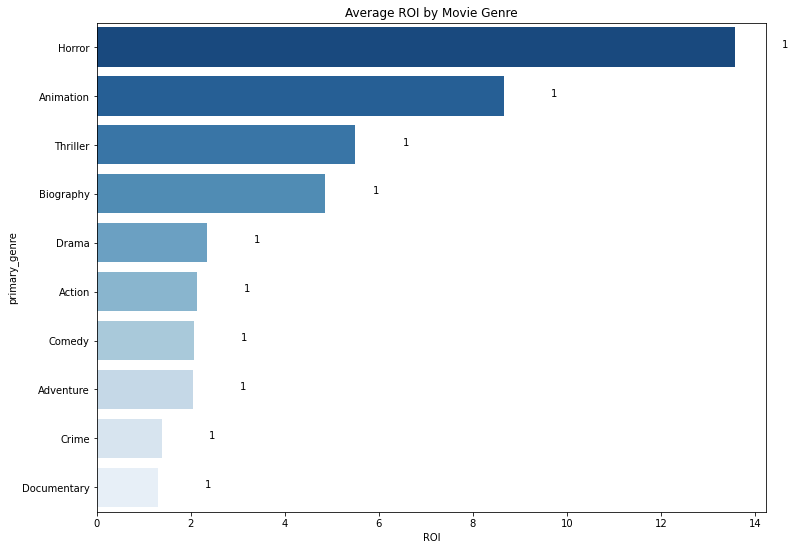

In [41]:
plt.figure(figsize=(12,9))
ax = sns.barplot(x = 'ROI', y = 'primary_genre', 
            data=frequent_genres_df, 
            palette="Blues_r")
ax.set_title('Average ROI by Movie Genre');

for p in ax.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
 # adding text to each bar
    ax.text(x = width+1, # x-coordinate position of data label, padded 3 to right of bar
            y = p.get_y()+(height/2),
            s = '{:.0f}'.format(height)) # # y-coordinate position of data label, padded to be in the middle of the bar
             # data label, formatted to ignore decimals
             # sets vertical alignment (va) to center

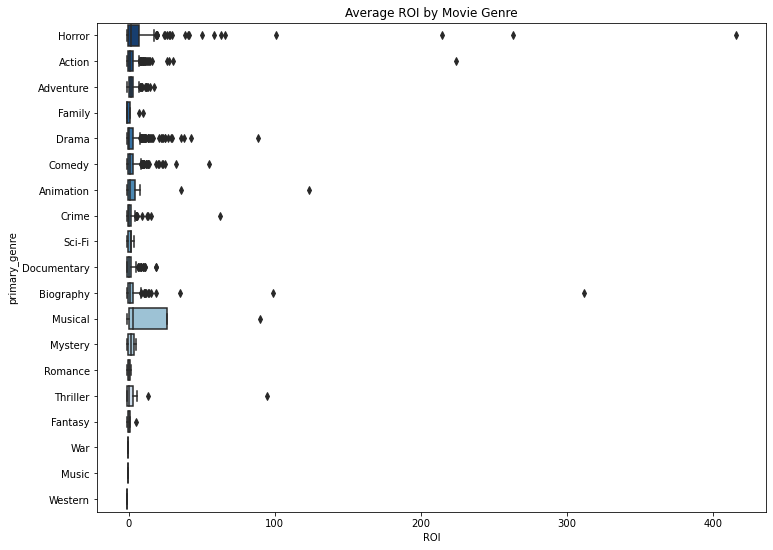

In [46]:
plt.figure(figsize=(12,9))
ax = sns.boxplot(x = 'ROI', y = 'primary_genre', 
            data=title_budgets_df, 
            palette="Blues_r")
ax.set_title('Average ROI by Movie Genre');

In [39]:
ax.patches

AttributeError: 'Text' object has no attribute 'patches'

Looking at the top 10 most frequent movie genres, horror films have the greatest ROI, followed by animation films.

In [37]:
#label each bar in barplot:
for p in ax.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
 # adding text to each bar
    ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
            y = p.get_y()+(height/2),
            s = '{:.0f}'.format(height)) # # y-coordinate position of data label, padded to be in the middle of the bar
             # data label, formatted to ignore decimals
             # sets vertical alignment (va) to center

SyntaxError: f-string: empty expression not allowed (<ipython-input-37-4e8959d80fca>, line 8)

### Profitability by Release Date

Next, we are interested in learning more about how ROI and grossings are affected by release date of the film. Let's start with finding which release month is most profitable.

In [76]:
title_budgets_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,movie_length
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,93.0,Horror,5.532577,Horror,Dec,2009,normal
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,136.0,"Action,Adventure,Fantasy",1.546673,Action,May,2011,long
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,113.0,"Action,Adventure,Sci-Fi",-0.572108,Action,Jun,2019,normal
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,141.0,"Action,Adventure,Sci-Fi",3.243841,Action,May,2015,long
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",5.827114,Action,Apr,2018,long
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7204,"Apr 28, 2006",Clean,10000.0,138711.0,1.387110e+05,tt6619196,70.0,"Comedy,Drama,Horror",12.871100,Comedy,Apr,2006,short
7205,"Jul 6, 2001",Cure,10000.0,94596.0,9.459600e+04,tt1872026,93.0,Drama,8.459600,Drama,Jul,2001,normal
7211,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,tt1880418,95.0,"Comedy,Drama",-0.490667,Comedy,Jan,2012,normal
7216,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,tt7837402,77.0,"Horror,Sci-Fi,Thriller",-1.000000,Horror,Dec,2018,short


In [77]:
title_budgets_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
tconst               0
runtime_minutes      0
genres               0
ROI                  0
primary_genre        0
release_month        0
release_year         0
movie_length         0
dtype: int64

In [44]:
profit_by_month_df = title_budgets_df.groupby(['release_month']).mean().reset_index()
profit_by_month_df

,release_month,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,release_year
0,Apr,2.899969e+07,3.511618e+07,8.823994e+07,100.897436,2.591866,2010.543590
1,Aug,2.787063e+07,3.459260e+07,7.115175e+07,98.000000,3.381956,2009.356383
2,Dec,3.387381e+07,4.684785e+07,1.153397e+08,102.757353,1.803441,2009.952206
3,Feb,3.318081e+07,4.480296e+07,9.762361e+07,100.287500,3.384223,2009.868750
4,Jan,2.535575e+07,2.847923e+07,6.239345e+07,100.035211,3.252669,2010.577465
5,Jul,4.519908e+07,5.857441e+07,1.512213e+08,102.143678,5.118719,2010.545977
6,Jun,5.276195e+07,7.604674e+07,1.855321e+08,102.469274,2.744435,2009.240223
7,Mar,4.114572e+07,4.779093e+07,1.122321e+08,101.388601,1.534482,2011.963731
8,May,5.864749e+07,6.971643e+07,1.824343e+08,102.940789,2.516955,2010.927632
9,Nov,4.757829e+07,6.181809e+07,1.580759e+08,106.345550,4.071593,2010.078534


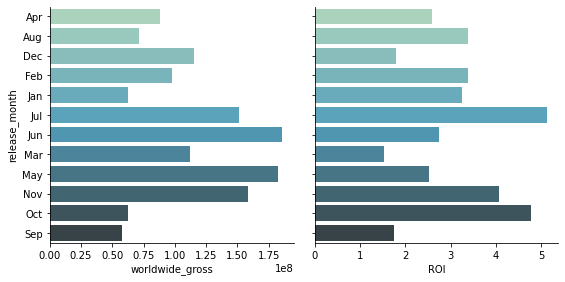

In [50]:
g = sns.PairGrid(profit_by_month_df, y_vars=['release_month'], x_vars=['worldwide_gross', 'ROI'], height=4, palette='GnBu_d')
g.map(sns.barplot, color=".3")

<AxesSubplot:xlabel='release_year', ylabel='ROI'>

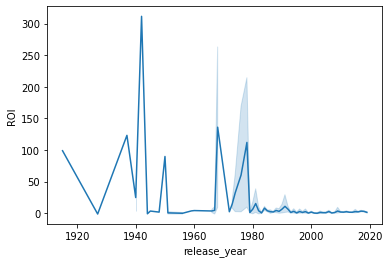

In [80]:
sns.lineplot(x='release_year', y='ROI', data = title_budgets_df)


<AxesSubplot:xlabel='runtime_minutes', ylabel='ROI'>

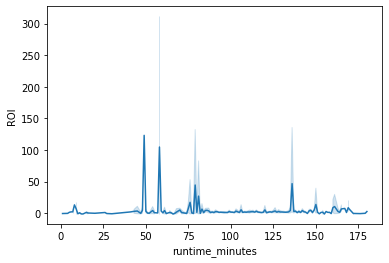

In [81]:
sns.lineplot(x='runtime_minutes', y='ROI', data = title_budgets_df)

In [51]:
profit_by_year_df = title_budgets_df.groupby(['release_year']).mean().reset_index()

In [52]:
profit_by_year_df.sort_values(by = ['release_year'], inplace=True)

In [53]:
profit_by_year_df

,release_year,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI
0,1915,1.100000e+05,1.000000e+07,1.100000e+07,120.000000,99.000000
1,1927,2.000000e+06,0.000000e+00,0.000000e+00,84.000000,-1.000000
2,1937,1.488000e+06,1.849255e+08,1.849255e+08,49.000000,123.277880
3,1940,1.952416e+06,5.787333e+07,5.787412e+07,82.000000,25.009473
4,1942,8.580000e+05,1.027970e+08,2.680000e+08,58.000000,311.354312
...,...,...,...,...,...,...
57,2015,2.742856e+07,3.287907e+07,8.461210e+07,102.832117,2.816482
58,2016,4.163351e+07,5.426165e+07,1.345835e+08,105.776596,2.411782
59,2017,5.339160e+07,6.437210e+07,1.801815e+08,107.525180,3.510740
60,2018,4.826006e+07,7.440656e+07,1.843960e+08,108.776000,3.166406


<AxesSubplot:xlabel='release_year', ylabel='ROI'>

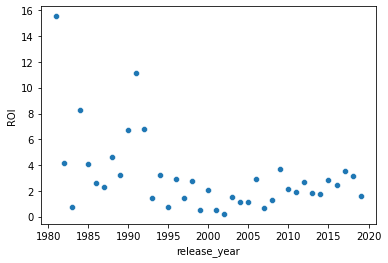

In [55]:
sns.scatterplot(data=profit_by_year_df[profit_by_year_df['release_year']>1980], x='release_year', y='ROI')

### Length of Movie

<AxesSubplot:xlabel='runtime_minutes', ylabel='ROI'>

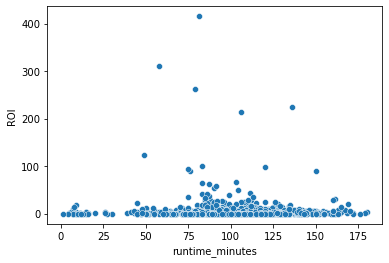

In [56]:
sns.scatterplot(data=title_budgets_df, x='runtime_minutes', y='ROI')

In [58]:
title_budgets_df['runtime_minutes'].describe()

count    2264.000000
mean      101.708039
std        22.080858
min         1.000000
25%        90.000000
50%       101.000000
75%       113.000000
max       180.000000
Name: runtime_minutes, dtype: float64

In [65]:
title_budgets_df['ROI'].describe()

count    2264.000000
mean        3.038716
std        15.610563
min        -1.000000
25%        -0.626455
50%         0.682727
75%         2.739784
max       415.564740
Name: ROI, dtype: float64

Break the run time minutes into categories--long, short or normal.

In [59]:
def movie_length_type(minutes):
    if (minutes < 90):
        return 'short'
    elif (minutes> 120):
        return 'long'
    else:
        return 'normal'

In [61]:
title_budgets_df['movie_length'] = title_budgets_df['runtime_minutes'].apply(movie_length_type)
title_budgets_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,movie_length
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,93.0,Horror,5.532577,Horror,Dec,2009,normal
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,136.0,"Action,Adventure,Fantasy",1.546673,Action,May,2011,long
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,113.0,"Action,Adventure,Sci-Fi",-0.572108,Action,Jun,2019,normal
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,141.0,"Action,Adventure,Sci-Fi",3.243841,Action,May,2015,long
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",5.827114,Action,Apr,2018,long
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7204,"Apr 28, 2006",Clean,10000.0,138711.0,1.387110e+05,tt6619196,70.0,"Comedy,Drama,Horror",12.871100,Comedy,Apr,2006,short
7205,"Jul 6, 2001",Cure,10000.0,94596.0,9.459600e+04,tt1872026,93.0,Drama,8.459600,Drama,Jul,2001,normal
7211,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,tt1880418,95.0,"Comedy,Drama",-0.490667,Comedy,Jan,2012,normal
7216,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,tt7837402,77.0,"Horror,Sci-Fi,Thriller",-1.000000,Horror,Dec,2018,short


<AxesSubplot:xlabel='ROI', ylabel='movie_length'>

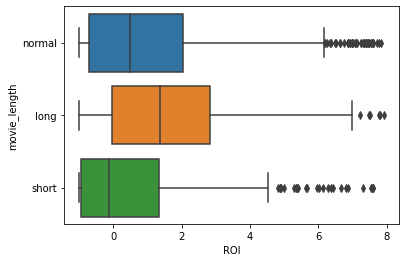

In [67]:
sns.boxplot(data=title_budgets_df[title_budgets_df['ROI']<8], x='ROI', y='movie_length')

<AxesSubplot:xlabel='worldwide_gross', ylabel='movie_length'>

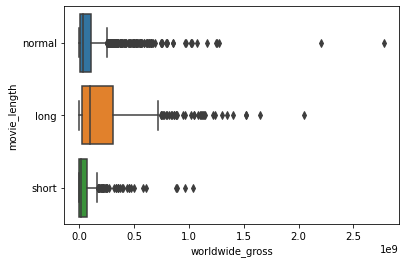

In [68]:
sns.boxplot(data=title_budgets_df, x='worldwide_gross', y='movie_length')

### Who are the highest grossing directors?

In order to figure out which directors brought in the most money, we will need to merge our two dataframes, directors_df and title_budgets_df.

In [84]:
## merge directors_df with title_budgets_df to get all title and budget information.

directors_title_budgets_df = directors_df.merge(title_budgets_df, how = 'left', left_on = 'tconst', right_on = 'tconst')
directors_title_budgets_df

,nconst,primary_name,primary_profession,known_for_titles,tconst,category,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,movie_length
0,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2057445,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt1592569,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2590280,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt8421806,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nm0064023,Bryan Beasley,"director,producer,writer","tt3501180,tt1485100,tt1358897,tt1387162",tt3501180,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146449,nm9971456,Zheng Wei,director,NaN,tt8697720,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146450,nm9980896,Rama Narayanan,"director,writer","tt10127906,tt8715016,tt8919136,tt8929818",tt8715016,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146451,nm9980896,Rama Narayanan,"director,writer","tt10127906,tt8715016,tt8919136,tt8929818",tt8919136,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146452,nm9981679,Samir Eshra,"director,writer,cinematographer",NaN,tt8717234,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
directors_title_budgets_df.isna().sum()

nconst                     0
primary_name               0
primary_profession       587
known_for_titles        4207
tconst                     0
category                   0
release_date          144089
movie                 144089
production_budget     144089
domestic_gross        144089
worldwide_gross       144089
runtime_minutes       144089
genres                144089
ROI                   144089
primary_genre         144089
release_month         144089
release_year          144089
movie_length          144089
dtype: int64

We can see there were 144,000 values in or directors_df that weren't able to match to a film in title_budgets_df. Let's drop all rows with missing values for worldwide_gross, since they won't be helpful for our analysis.

In [86]:
directors_title_budgets_df.dropna(subset=['worldwide_gross'], inplace=True)
directors_title_budgets_df

,nconst,primary_name,primary_profession,known_for_titles,tconst,category,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,movie_length
40,nm0101047,David Bowers,"animation_department,director,writer","tt2023453,tt1650043,tt0375568,tt0424095",tt2023453,director,"Aug 3, 2012",Diary of a Wimpy Kid: Dog Days,22000000.0,49008662.0,77229695.0,94.0,"Comedy,Family",2.510441,Comedy,Aug,2012.0,normal
41,nm0101047,David Bowers,"animation_department,director,writer","tt2023453,tt1650043,tt0375568,tt0424095",tt1650043,director,"Mar 25, 2011",Diary of a Wimpy Kid: Rodrick Rules,18000000.0,52698535.0,73695194.0,99.0,"Comedy,Family",3.094177,Comedy,Mar,2011.0,normal
42,nm0101047,David Bowers,"animation_department,director,writer","tt2023453,tt1650043,tt0375568,tt0424095",tt6003368,director,"May 19, 2017",Diary of a Wimpy Kid: The Long Haul,22000000.0,20738724.0,35609577.0,91.0,"Comedy,Family",0.618617,Comedy,May,2017.0,normal
45,nm0103187,Dan Bradley,"stunts,assistant_director,actor","tt0244244,tt0440963,tt1229238,tt0372183",tt1234719,director,"Nov 21, 2012",Red Dawn,65000000.0,44806783.0,48164150.0,93.0,"Action,Sci-Fi,Thriller",-0.259013,Action,Nov,2012.0,normal
77,nm0135952,Nae Caranfil,"writer,director,actor","tt0839967,tt2017486,tt0314067,tt0175575",tt2017486,director,"Apr 17, 2014",Closer to the Moon,1500000.0,0.0,5396.0,112.0,"Comedy,Crime,Drama",-0.996403,Comedy,Apr,2014.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142829,nm7448856,Mauricio Hernandez,"producer,director,editor","tt4849322,tt8917508",tt4849322,director,"Oct 29, 2004",Birth,20000000.0,5005899.0,14603001.0,9.0,"Adventure,Documentary",-0.269850,Adventure,Oct,2004.0,short
143768,nm5862289,M.S. Sreenath,director,tt3107798,tt3107798,director,"Jan 25, 2008",Rambo,47500000.0,42754105.0,112214531.0,144.0,"Comedy,Drama,Thriller",1.362411,Comedy,Jan,2008.0,long
144209,nm8520144,Gudmund Sand,"director,writer,editor","tt6162064,tt6178382",tt6178382,director,"Dec 9, 1988",Twins,15000000.0,111936388.0,216600000.0,8.0,"Adventure,Biography,Comedy",13.440000,Adventure,Dec,1988.0,short
145851,nm7372429,Andrius Blazevicius,"writer,director,editor","tt9348578,tt5846676,tt4744442,tt4738604",tt5846676,director,"Apr 4, 1997",The Saint,90000000.0,61363304.0,169400000.0,96.0,Drama,0.882222,Drama,Apr,1997.0,normal


Now that we have directors and their movie information in one place, there are two different ways of looking at the data. One way is to sort the DataFrame by worldwide_gross, and see who the directors are of the top movies. Or we can group the dataframe by director, and sum worldwide_gross to see which directors have made the most money overall.

**Method 1: Top Grossing Movies and their directors**

In [90]:
# sort dataFrame by worldwide_gross

directors_title_budgets_df.sort_values(by='worldwide_gross', ascending=False, inplace=True)
directors_title_budgets_df

,nconst,primary_name,primary_profession,known_for_titles,tconst,category,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,movie_length
91060,nm3786927,Atsushi Wada,director,"tt1594549,tt1775309,tt1602612",tt1775309,director,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,93.0,Horror,5.532577,Horror,Dec,2009.0,normal
10976,nm10047650,Ravi Punj,"director,writer,producer",tt8852130,tt8852130,director,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,115.0,Family,10.041042,Family,Dec,1997.0,normal
977,nm0751648,Joe Russo,"producer,director,writer","tt4154756,tt4154796,tt1843866,tt3498820",tt4154756,director,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,149.0,"Action,Adventure,Sci-Fi",5.827114,Action,Apr,2018.0,long
15489,nm0751577,Anthony Russo,"producer,director,writer","tt1843866,tt4154756,tt3498820,tt4154796",tt4154756,director,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,149.0,"Action,Adventure,Sci-Fi",5.827114,Action,Apr,2018.0,long
25273,nm1119880,Colin Trevorrow,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",tt0369610,director,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,124.0,"Action,Adventure,Sci-Fi",6.669092,Action,Jun,2015.0,long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34542,nm1248013,Coke Daniels,"director,producer,writer","tt1693107,tt6026940,tt0452706,tt5773890",tt1693107,director,"Dec 31, 2012",Highway,2000000.0,0.0,0.000000e+00,77.0,Comedy,-1.000000,Comedy,Dec,2012.0,short
34021,nm0215522,Ken Del Conte,"actor,producer,director","tt4574912,tt8170358,tt1328873,tt0058855",tt1328873,director,"Dec 31, 2010",Death Calls,290000.0,0.0,0.000000e+00,90.0,"Action,Adventure,Mystery",-1.000000,Action,Dec,2010.0,normal
25888,nm0000490,Spike Lee,"director,producer,writer","tt7349662,tt0104797,tt0097216,tt0091939",tt3104930,director,"Jan 13, 2015",Da Sweet Blood of Jesus,1250000.0,0.0,0.000000e+00,123.0,"Comedy,Romance,Thriller",-1.000000,Comedy,Jan,2015.0,long
2038,nm0311086,William Gazecki,"sound_department,editor,producer","tt0094898,tt0120472,tt0870112,tt2825768",tt2825768,director,"Jul 24, 2015",The Outrageous Sophie Tucker,500000.0,0.0,0.000000e+00,96.0,Documentary,-1.000000,Documentary,Jul,2015.0,normal


<AxesSubplot:xlabel='primary_name', ylabel='worldwide_gross'>

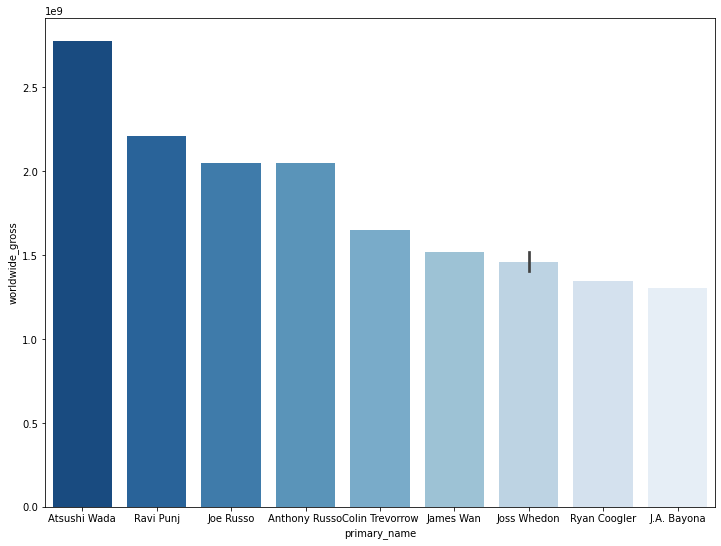

In [98]:
# plot worldwide_gross by top 10 directors
plt.figure(figsize=(12,9))
sns.barplot(x = 'primary_name', y = 'worldwide_gross', data = directors_title_budgets_df[0:10], palette = "Blues_r")


**Method 2: Top 10 Grossing Directors Overall**

In [99]:
sorted_directors_df = directors_title_budgets_df.groupby(['primary_name']).sum().reset_index()
sorted_directors_df.sort_values(by='worldwide_gross', ascending=False, inplace=True)
sorted_directors_df

,primary_name,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,release_year
103,Anthony Russo,720000000.0,1.346647e+09,3.902606e+09,432.0,12.589756,6048.0
767,Joe Russo,720000000.0,1.346647e+09,3.902606e+09,432.0,12.589756,6048.0
291,Christopher Nolan,750000000.0,1.118801e+09,3.086180e+09,587.0,12.536356,8053.0
680,James Wan,371500000.0,8.794781e+08,3.083488e+09,495.0,93.641967,8057.0
860,Joss Whedon,615600000.0,1.105671e+09,2.969535e+09,427.0,8.799980,6025.0
...,...,...,...,...,...,...,...
644,Jack Heller,500000.0,0.000000e+00,0.000000e+00,90.0,-1.000000,2012.0
1382,Robert Heath,1000000.0,0.000000e+00,0.000000e+00,96.0,-1.000000,2012.0
601,Hank Braxtan,3000000.0,0.000000e+00,0.000000e+00,89.0,-1.000000,2015.0
599,H.M. Coakley,750000.0,0.000000e+00,0.000000e+00,91.0,-1.000000,2016.0


<AxesSubplot:xlabel='primary_name', ylabel='worldwide_gross'>

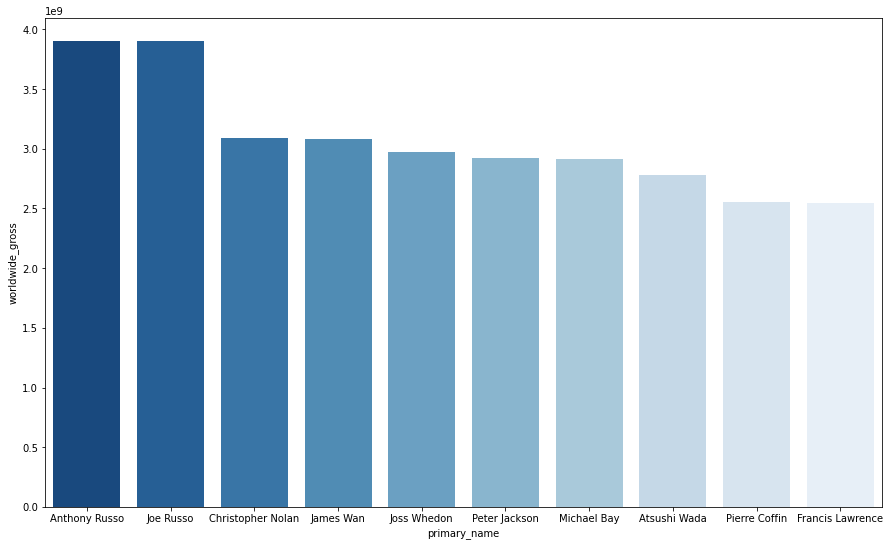

In [101]:
plt.figure(figsize=(15,9))
sns.barplot(x = 'primary_name', y = 'worldwide_gross', data = sorted_directors_df[0:10], palette = "Blues_r")

Now let's also look at what movies Anthony and Joe Russo have directed.

In [112]:
directors_title_budgets_df[directors_title_budgets_df['primary_name']=='Joe Russo']

,nconst,primary_name,primary_profession,known_for_titles,tconst,category,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,movie_length
977,nm0751648,Joe Russo,"producer,director,writer","tt4154756,tt4154796,tt1843866,tt3498820",tt4154756,director,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,149.0,"Action,Adventure,Sci-Fi",5.827114,Action,Apr,2018.0,long
975,nm0751648,Joe Russo,"producer,director,writer","tt4154756,tt4154796,tt1843866,tt3498820",tt3498820,director,"May 6, 2016",Captain America: Civil War,250000000.0,408084349.0,1.140069e+09,147.0,"Action,Adventure,Sci-Fi",3.560278,Action,May,2016.0,long
974,nm0751648,Joe Russo,"producer,director,writer","tt4154756,tt4154796,tt1843866,tt3498820",tt1843866,director,"Apr 4, 2014",Captain America: The Winter Soldier,170000000.0,259746958.0,7.144019e+08,136.0,"Action,Adventure,Sci-Fi",3.202364,Action,Apr,2014.0,long


Both directors directed action movies, specifically superhero franchises.